# Pymaceuticals Inc.
---

### Analysis

-  Capomulin & Ramicane were the most heavily used drug regimen which each being used over 200 timepoints during the duration of the trial.

- This higher usage lead to a mean Tumor Vol being noticibly lower than the rest of the frug regimens.

- With the gender split being 51% / 49%, there does not seem to be a noticible difference in drug performance based on gender.

- The data shows that there is a correlation between mouse weight (g) and average tumor volume (mm3).
 

In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)




In [59]:
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [60]:
study_results = pd.read_csv(study_results_path)
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [61]:
# Combine the data into a single dataset
merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [62]:
# Checking the number of mice.
merge_df['Mouse ID'].nunique()

249

In [63]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = merge_df[merge_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [64]:
# Optional: Get all the data for the duplicate mouse ID. 


In [65]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_id = 'g989'

clean_mousedata_df = merge_df[merge_df['Mouse ID'] != mouse_id]

In [66]:
# Checking the number of mice in the clean DataFrame.
clean_mousedata_df.nunique()

Mouse ID               248
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
dtype: int64

## Summary Statistics

In [67]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

drug_regimen_df = clean_mousedata_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])

drug_regimen_df.reset_index(inplace=True)

drug_regimen_df = drug_regimen_df.rename(columns = {'mean': 'Mean Tumor Vol', 'median': 'Median Tumor Vol',
                                                 'var': 'Var Tumor Vol', 'std': 'Std Dev Tumor Vol',
                                                 'sem': 'SEM Tumor Volume'})

# Assemble the resulting series into a single summary DataFrame.
drug_regimen_df


,Drug Regimen,Mean Tumor Vol,Median Tumor Vol,Var Tumor Vol,Std Dev Tumor Vol,SEM Tumor Volume
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [68]:
# Using the aggregation method, produce the same summary statistics in a single line.


single_summary_df =clean_mousedata_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':["mean","median","var","std","sem"]})
single_summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Number of Timepoints for Mice per Drug Regimen '}, xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

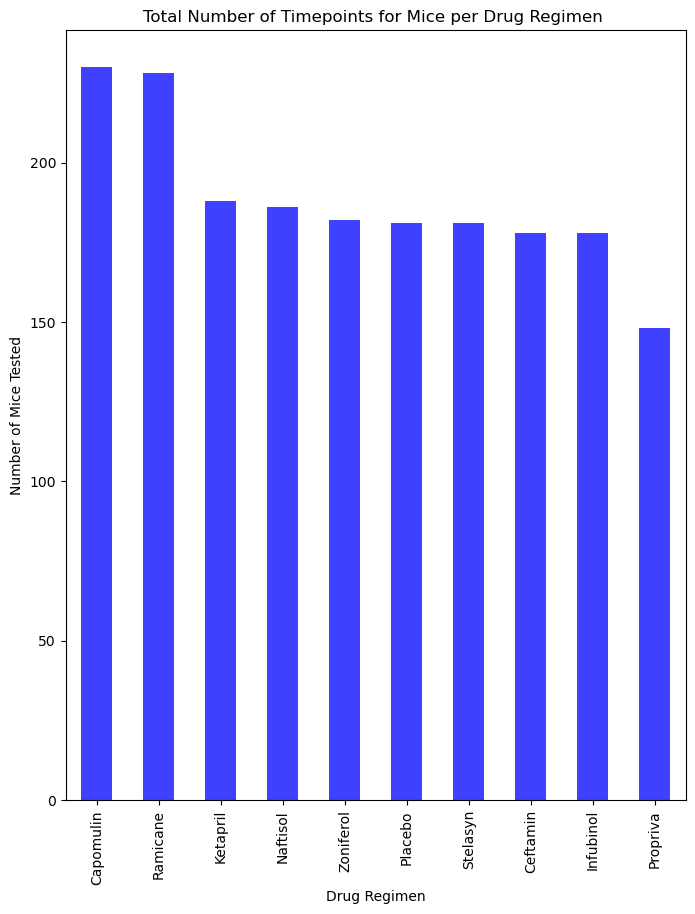

In [69]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#groupby drig
timepoint_mouse = clean_mousedata_df.groupby('Drug Regimen')

#count all tp's
counts = timepoint_mouse["Timepoint"].count()

#sort high to low
counts = counts.sort_values(ascending=False)

#plot
figure1 = counts.plot(kind="bar", facecolor="blue", alpha= 0.75, figsize=(8,10),
                         title = "Total Number of Timepoints for Mice per Drug Regimen ",
                          xlabel='Drug Regimen',
                          ylabel="Number of Mice Tested" )


figure1


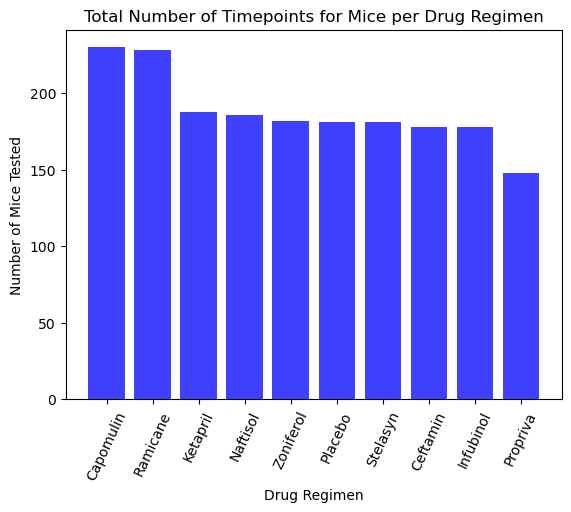

In [70]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

timepoint_mouse2 = clean_mousedata_df.groupby('Drug Regimen')

counts2 = timepoint_mouse2["Timepoint"].count()
counts2 = counts.sort_values(ascending=False)

x_labels = counts2.index
y_values = counts2.values
plt.bar(x_labels, y_values, color='b',alpha=0.75)

# add a title and labels to the x and y axes
plt.title('Total Number of Timepoints for Mice per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')

# rotate the x-axis labels d
plt.xticks(rotation=65)

plt.show()


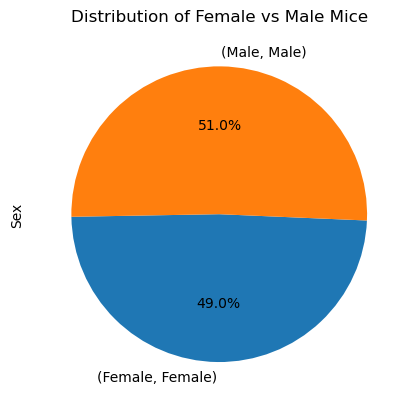

In [71]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender = clean_mousedata_df.groupby('Sex')

gender_counts = gender['Sex'].value_counts()

gender_pdpie = gender_counts.plot(kind='pie', y='Sex', title= 'Distribution of Female vs Male Mice',
                                  autopct='%1.1f%%', startangle=181)

plt.show()


In [72]:
gender_counts = gender['Sex'].value_counts()
gender_counts

Sex     Sex   
Female  Female    922
Male    Male      958
Name: Sex, dtype: int64

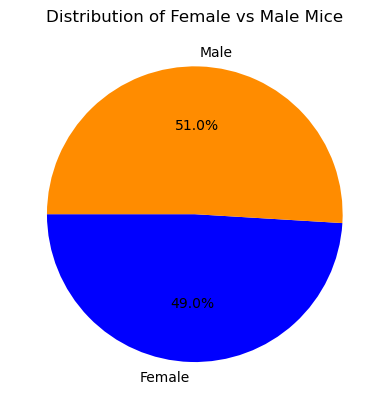

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

count =[922,958]

labels = ['Female', 'Male']

colors=['blue', 'darkorange']
        
plt.pie(count, labels=labels, colors=colors, autopct='%1.1f%%', startangle=180) 


plt.title('Distribution of Female vs Male Mice') 

plt.show()

## Quartiles, Outliers and Boxplots

In [74]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

four_regimen_df = clean_mousedata_df[clean_mousedata_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

final_volume = four_regimen_df.groupby(['Mouse ID'])['Tumor Volume (mm3)'].last()

final_volume

Mouse ID
a203    67.973419
a251    65.525743
a275    62.999356
a411    38.407618
a444    43.047543
          ...    
y769    68.594745
y793    31.896238
y865    64.729837
z578    30.638696
z581    62.754451
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [75]:
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint= four_regimen_df.groupby('Mouse ID')

greatest_timepoint_df = max_timepoint['Timepoint'].max()

greatest_timepoint_df

Mouse ID
a203    45
a251    45
a275    45
a411    45
a444    45
        ..
y769    45
y793    45
y865    45
z578    45
z581    45
Name: Timepoint, Length: 100, dtype: int64

In [76]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
greatest_timepoint_df = greatest_timepoint_df.reset_index()

merged2_df = pd.merge(greatest_timepoint_df,clean_mousedata_df, on=["Mouse ID", "Timepoint"], how="left")

merged2_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [77]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

for drug in treatments:
    drug_df = clean_mousedata_df.loc[clean_mousedata_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']

    # add subset to tumor_vol_data list
    tumor_vol_data.append(drug_df)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartile = drug_df.quantile([0.25, 0.5, 0.75])
    lowerq= quartile[0.25]
    upperq= quartile[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr) 
    
    # Determine outliers using upper and lower bounds
    outliers = drug_df[(drug_df < lower_bound) | (drug_df > upper_bound)]

    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: 1652    25.472143
1849    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 1814    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


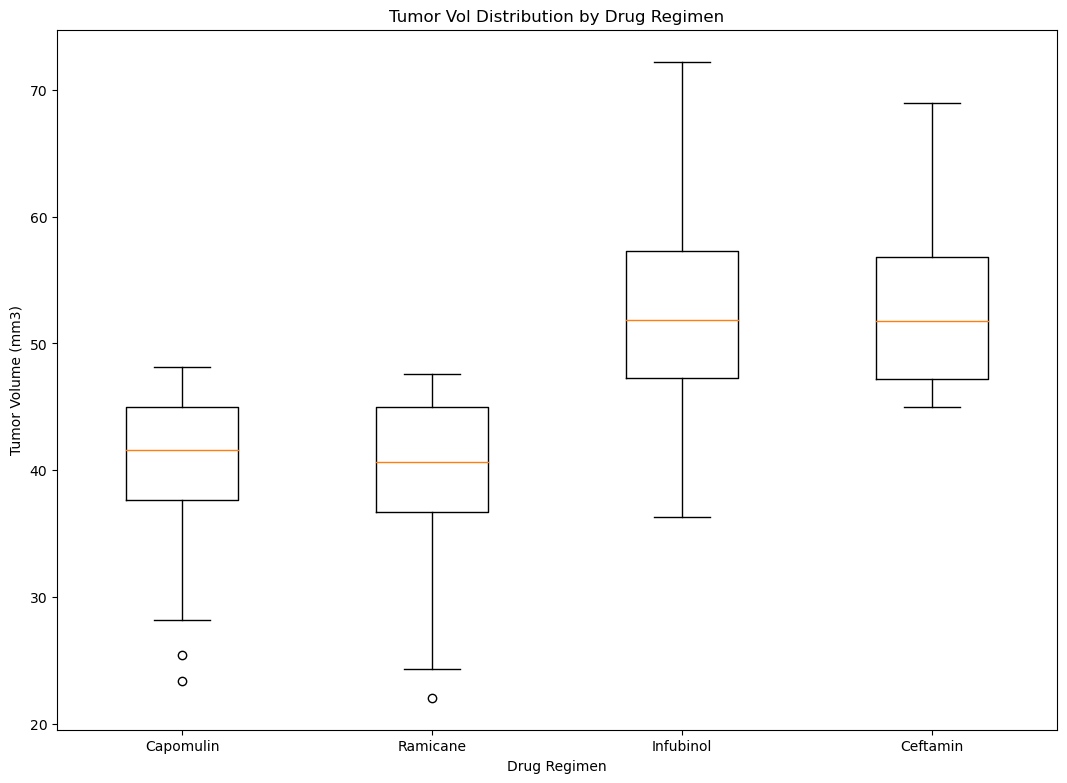

In [78]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

#fig instance
fig = plt.figure(figsize= (10,7))

#axes instance
ax = fig.add_axes([0,0,1,1])

#creating boxplot
bp = ax.boxplot(tumor_vol_data, labels = treatments)

#adding title / labels

ax.set_title("Tumor Vol Distribution by Drug Regimen")
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Tumor Volume (mm3)")

plt.show()


## Line and Scatter Plots

In [79]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#filter df to Capomulin
capomulin_df = clean_mousedata_df[clean_mousedata_df['Drug Regimen'] == 'Capomulin']

#grab unique mouse id's
mouse_ids = capomulin_df["Mouse ID"].unique()

#select one mouse
specialmouse_id = mouse_ids[3]

moused_df = capomulin_df[capomulin_df["Mouse ID"] == specialmouse_id]


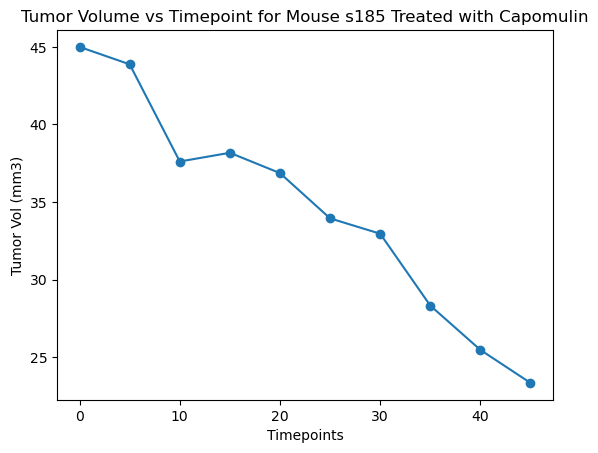

In [80]:
#plot 
plt.plot(moused_df['Timepoint'], moused_df['Tumor Volume (mm3)'], marker= 'o')

#add labels
plt.xlabel("Timepoints")
plt.ylabel("Tumor Vol (mm3)")
plt.title(f"Tumor Volume vs Timepoint for Mouse {specialmouse_id} Treated with Capomulin")

plt.show()

In [83]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#filter df to Capomulin
capomulin_df = clean_mousedata_df[clean_mousedata_df['Drug Regimen'] == 'Capomulin']

grouped_capo_df = capomulin_df.groupby(["Mouse ID"]).mean()


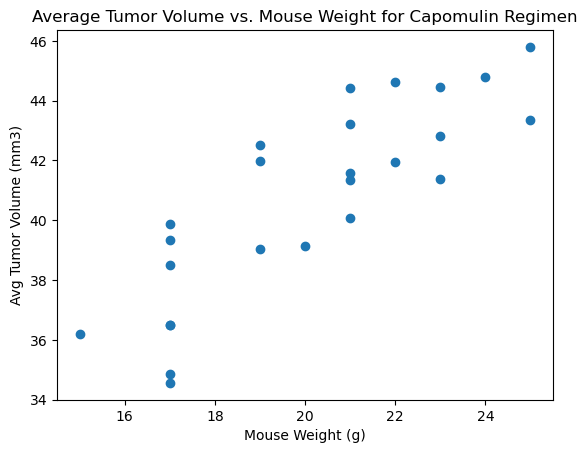

In [82]:
#plot scatter

plt.scatter(grouped_capo_df["Weight (g)"], grouped_capo_df["Tumor Volume (mm3)"])

plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Regimen")

plt.show()


## Correlation and Regression

In [86]:
# Calculate the correlation coefficient and linear regression model 
#for mouse weight and average tumor volume for the Capomulin regimen

#filter df to Capomulin
capomulin_df = clean_mousedata_df[clean_mousedata_df['Drug Regimen'] == 'Capomulin']

grouped_capo_df = capomulin_df.groupby(["Mouse ID"]).mean()

#correlation 
correlation = st.pearsonr(grouped_capo_df['Weight (g)'], grouped_capo_df['Tumor Volume (mm3)'])[0] 

correlation

0.841936342469472

In [87]:
#linear regression model

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(grouped_capo_df['Weight (g)'], 
                                                           grouped_capo_df['Tumor Volume (mm3)'])

regress_values = grouped_capo_df['Weight (g)'] * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

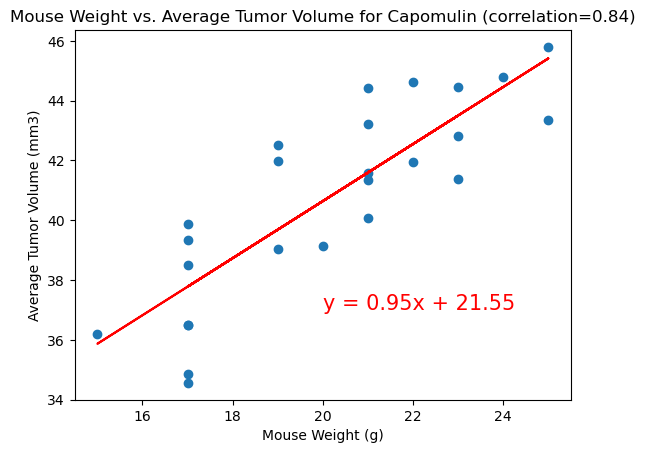

In [88]:
#plot
plt.scatter(grouped_capo_df['Weight (g)'], grouped_capo_df['Tumor Volume (mm3)'])

plt.plot(grouped_capo_df['Weight (g)'], regress_values, "r-")
plt.annotate(line_eq, (20, 37), fontsize=15, color="red")

plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title(f'Mouse Weight vs. Average Tumor Volume for Capomulin (correlation={correlation:.2f})')

plt.show()